# <center> Data augmentation </center>

The data augmentation methods used for the purpose of this notebook are: **RandomHorizontalFlip**, **RandomVerticalFlip**, **RandomRotation**, **RandomCrop** with padding, **RandomColorJitter**, **RandomAutocontrast** and **RandomEqualize**.

Inforation on Python iterators: https://www.w3schools.com/python/python_iterators.asp

Information on next(iter(trainloader) : <br> 
https://stackoverflow.com/questions/62549990/what-does-next-and-iter-do-in-pytorchs-dataloader <br>
https://discuss.pytorch.org/t/iterating-through-a-dataloader-object/25437

imshow() takes images as H,W,C.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). <br>

https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

https://datamahadev.com/performing-image-augmentation-using-pytorch/

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

In [2]:
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(csv_file, header=None)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels) 

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.img_labels.iloc[idx, 0]) + ".png")
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

List of Pytorch transformations to do data augmentation: <br>

https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
batch_size = 8

trainset = CustomImageDataset("../tables/train.csv", 
                              "../data/train", 
                              transform=transform)

testset = CustomImageDataset("../tables/test.csv", 
                             "../data/test", 
                             transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,    
                                         shuffle=False, num_workers=0)   
classes = ('no palm', 'palm')

## Random horizontal flip

torchvision.transforms.RandomHorizontalFlip(p=0.5)

In [5]:
transform_horizontal_flip = transforms.Compose([transforms.RandomHorizontalFlip(p=1)]) 

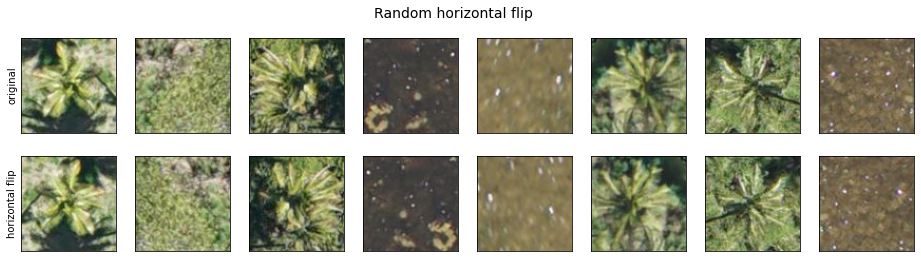

In [6]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img_transformed = transform_horizontal_flip(img)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('horizontal flip', color = 'black')
fig.suptitle('Random horizontal flip', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Radom vertical flip

torchvision.transforms.RandomVerticalFlip(p=0.5)

In [7]:
transform_veritcal_flip = transforms.Compose([transforms.RandomVerticalFlip(p=1)]) 

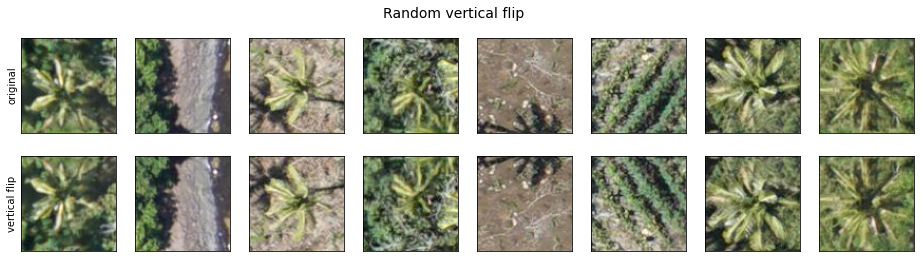

In [8]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img_transformed = transform_veritcal_flip(img)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('vertical flip', color = 'black')
fig.suptitle('Random vertical flip', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Random rotation

torchvision.transforms.RandomRotation

In [9]:
transform_random_rotation = transforms.Compose([transforms.RandomRotation(360)]) 

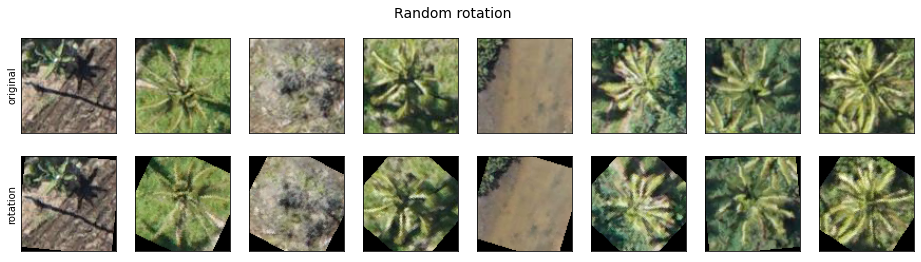

In [10]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img_transformed = transform_random_rotation(img)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('rotation', color = 'black')
fig.suptitle('Random rotation', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Random crop with padding

torchvision.transforms.RandomCrop

In [11]:
transform_random_crop = transforms.Compose([transforms.RandomCrop(size = 90, padding = 25)]) 

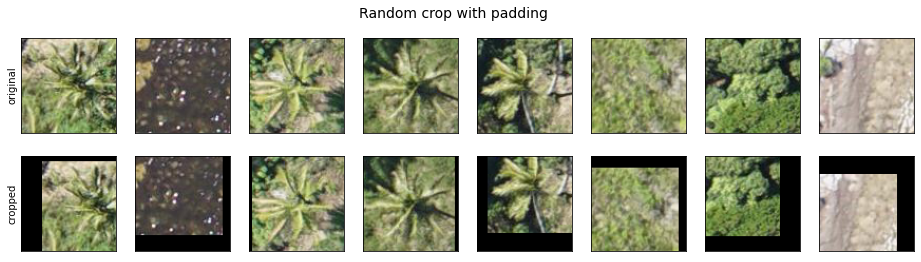

In [12]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img_transformed = transform_random_crop(img)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('cropped', color = 'black')
fig.suptitle('Random crop with padding', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Random color jitter

torchvision.transforms.ColorJitter

In [28]:
transform_random_jitter = transforms.Compose([transforms.ColorJitter(brightness=.7, hue=.35)]) 

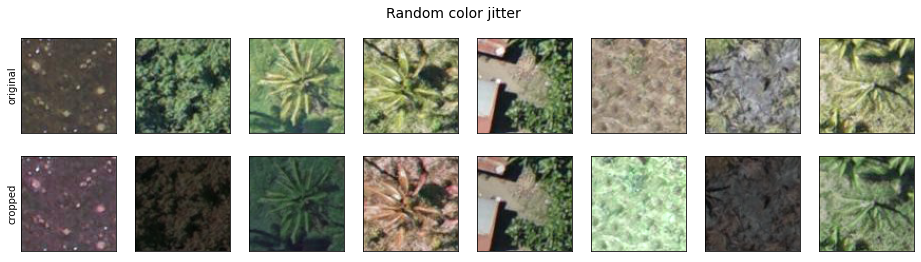

In [29]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img_transformed = transform_random_jitter(img)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('cropped', color = 'black')
fig.suptitle('Random color jitter', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Random autocontrast

torchvision.transforms.RandomAutocontrast

In [15]:
transform_random_autocontrast = transforms.Compose([transforms.RandomAutocontrast(p=1)]) 

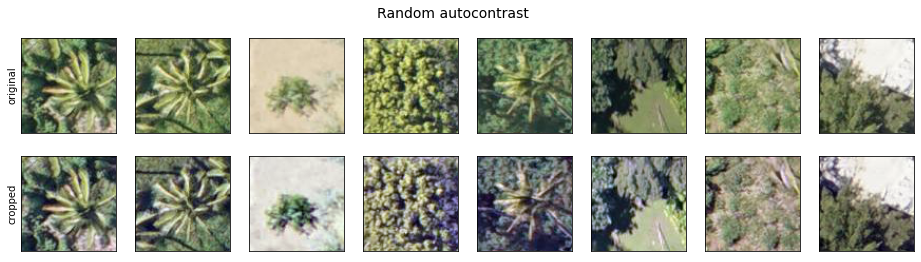

In [16]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img_transformed = transform_random_autocontrast(img)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('cropped', color = 'black')
fig.suptitle('Random autocontrast', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()


## Random equalize

torchvision.transforms.RandomEqualize

In [17]:
transform_random_randomequalize = transforms.Compose([torchvision.transforms.RandomEqualize(p=1)]) 

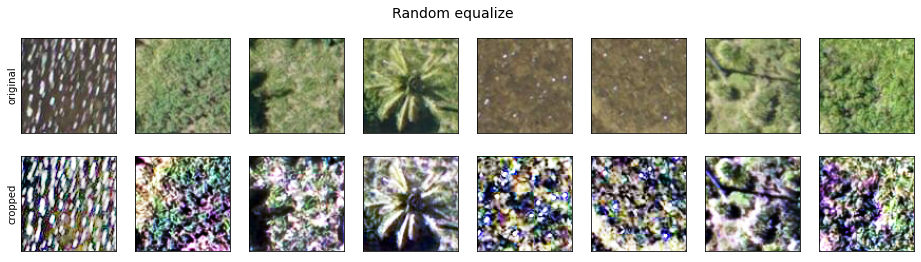

In [18]:
fig, axs = plt.subplots(2, batch_size, figsize = (16,4))
train_features, train_labels = next(iter(trainloader))

for i in range(batch_size):
    img = train_features[i].squeeze()
    img254 = img*254
    imguint8 = img254.type(torch.uint8)
    img_transformed = transform_random_randomequalize(imguint8)
    axs[0,i].imshow(np.transpose(img, (1,2,0)))
    axs[1,i].imshow(np.transpose(img_transformed, (1,2,0)))

axs[0,0].set_ylabel('original', color = 'black')
axs[1,0].set_ylabel('cropped', color = 'black')
fig.suptitle('Random equalize', fontsize=14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

In [19]:
print('End of notebook!')

End of notebook!
